## 1. Read patient-data.csv

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('patient-data.csv')

## 2. Clean data

In [25]:
df_cleaned = df.dropna()

## 3, 4, 5. Iteratively train and evaluate the model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# 3. Encode the categorical target variable 'Ailment'
le = LabelEncoder()
y_ailment_clean = le.fit_transform(df_cleaned['Ailment'])

X = df_cleaned.drop('Ailment', axis=1)
y = y_ailment_clean
print(' y shape ', y.shape, ' type ', type(y))

unique_values, frequencies = np.unique(y, return_counts=True)

# Combine them into a dictionary or print side-by-side
print("Unique Values:", unique_values)
print("Frequencies:", frequencies)

# To view as a list of (value, frequency) tuples:
# result1 = list(zip(unique_values, frequencies))
# print("Value Counts (NumPy):", result1)

metrics = []
train_sizes = np.linspace(0.8, 0.2, 5)

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

    scaler = StandardScaler()
    if True:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else: # to get nonstandard data for testing.
        X_train_scaled = X_train
        X_test_scaled = X_test


    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics.append({'train_size': size, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1})


 y shape  (2367,)  type  <class 'numpy.ndarray'>
Unique Values: [0 1 2 3 4 5]
Frequencies: [621 539 556  20 508 123]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Print the metrics

#### for standardized data we get following:
``` Different train size with metrics
 train_size  accuracy  precision    recall  f1_score
        0.80  0.993671   0.993754  0.993671  0.992336
        0.65  0.990350   0.990483  0.990350  0.986523
        0.50  0.990709   0.990813  0.990709  0.986805
        0.35  0.991553   0.983188  0.991553  0.987350
        0.20  0.992080   0.984255  0.992080  0.988144 

#### For Non-standardized data we get following:
    train_size  accuracy  precision    recall  f1_score
        0.80  0.474684   0.489199  0.474684  0.457701
        0.65  0.418577   0.438203  0.418577  0.400300
        0.50  0.416385   0.413560  0.416385  0.401388
        0.35  0.517219   0.523497  0.517219  0.508658
        0.20  0.376452   0.373237  0.376452  0.354419 

In [22]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   train_size  accuracy  precision    recall  f1_score
0        0.80  0.474684   0.489199  0.474684  0.457701
1        0.65  0.418577   0.438203  0.418577  0.400300
2        0.50  0.416385   0.413560  0.416385  0.401388
3        0.35  0.517219   0.523497  0.517219  0.508658
4        0.20  0.376452   0.373237  0.376452  0.354419


## 7. Create a pair-wise correlation anlaysis of first 10 independent features.

In [ ]:

correlation = X.iloc[:5, :5].corr()
min_val = 2
max_val = -2
n_rows = correlation.shape[0]
n_cols = correlation.shape[1]

print(correlation.shape)

for i in range(n_rows):
    row = correlation.iloc[i,:]
    for j in range(i+1,n_cols):
        if i==j:
            continue

        if (min_val > row.iloc[j]):
            min_row = i
            min_col = j
            min_val = row.iloc[j]

        if max_val < row.iloc[j]:
            max_row = i
            max_col = j
            max_val = row.iloc[j]


# print(correlation[:5][:5])
print(' min_cor ', min_val, ' r = ', min_row, ', c = ', min_col)
print(' max_cor ', max_val, ' r = ', max_row, ', c = ',max_col)

## Column Labels (Names)
Type: <class 'pandas.core.indexes.base.Index'>
Index(['p01', 'p02', 'p03', 'p04', 'p05'], dtype='object')
## Row Labels (Index)
Type: <class 'pandas.core.indexes.base.Index'>
Index(['p01', 'p02', 'p03', 'p04', 'p05'], dtype='object')
(5, 5)
 min_cor  -0.19848458051287798  r =  0 , c =  2
 max_cor  0.92870849256823  r =  3 , c =  4


## 8. Create Correlation heatmap of all independent features.

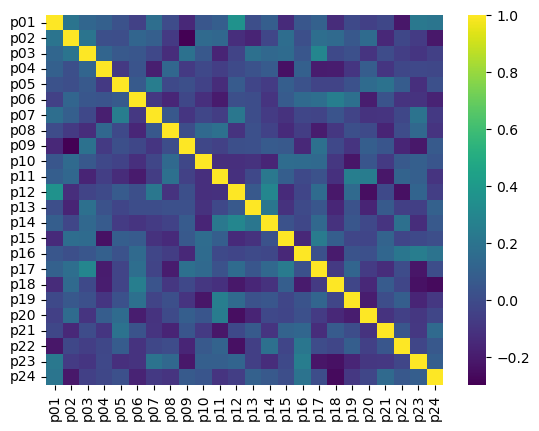

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(X.corr(), cmap ="viridis")
plt.show()

## As we can see from the correlation table and correlation heatmap